## 텍스트 생성

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

import urllib

import warnings
warnings.filterwarnings(action='ignore')

print(tf.__version__)

2.17.0


In [2]:
# irish-lyrics-eof.txt 데이터셋 파일 다운로드 , Windows용
# url = 'https://github.com/aaBadri/nlp-tf/blob/master/irish-lyrics-eof.txt'
# urllib.request.urlretrieve(url, 'irish-lyrics-eof.txt')

In [3]:
# 토큰화
tokenizer = Tokenizer()

data = open('irish-lyrics-eof.txt').read()

corpus = data.lower().split('\n')

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
# print(tokenizer.word_index)
print(total_words)  # 2690

2690


In [4]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len,
                                         padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)  # 원핫 인코딩

In [5]:
input_sequences

array([[   0,    0,    0, ...,    0,   51,   12],
       [   0,    0,    0, ...,   51,   12,   96],
       [   0,    0,    0, ...,   12,   96, 1217],
       ...,
       [   0,    0,    0, ...,    0,   47,  105],
       [   0,    0,    0, ...,   47,  105,  138],
       [   0,    0,    0, ...,  105,  138,  184]])

In [6]:
model = Sequential()
model.add(Embedding(total_words, 100, input_shape=(max_sequence_len-1,)))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', 
              optimizer=adam,
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 15, 100)             │         269,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 300)                 │         301,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2690)                │         809,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,379,890 (5.26 MB)

 Trainable params: 1,379,890 (5.26 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# 학습
history = model.fit(xs, ys, epochs=100, verbose=1)
print(model)

Epoch 1/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.0574 - loss: 6.8813
Epoch 2/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1132 - loss: 5.7373
Epoch 3/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1666 - loss: 4.7993
Epoch 4/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.2108 - loss: 4.4751
Epoch 5/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.3013 - loss: 3.5732
Epoch 6/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.4189 - loss: 2.6331
Epoch 7/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5046 - loss: 2.1659
Epoch 8/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5788 - loss: 1.8074
Epoch 9/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6398 - loss: 1.5313
Epoch 10/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6796 - loss: 1.3445
Epoch 11/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7078 - loss: 1.2122
Epoch 12/100
377/377 ━━━━━━━━━

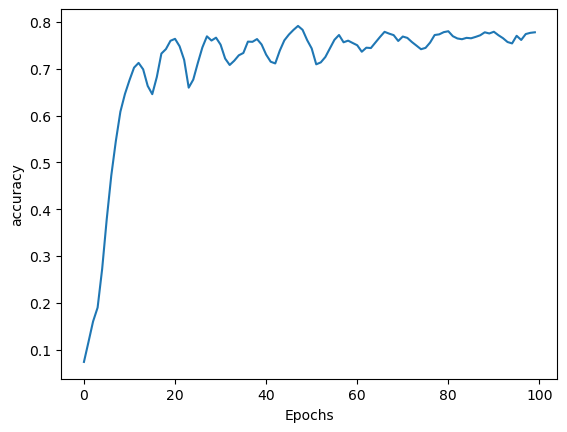

In [8]:
# 시각화
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()
    
plot_graphs(history, 'accuracy')

In [9]:
# 텍스트(문장) 생성
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = tf.argmax(model.predict(token_list, verbose=0),axis=1)
    #print(model.predict(token_list, verbose=0))
    #input()
    
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this i will be seen like them an old almanack too late i lovd best games played thy rights shall hear love you so low or regret today of you bragh find tree do see again for one save her ma when she held nor anguish got grand dreams were wed violin claret out too ra color now them now or else ill expire mary white with her love art heavenward foot o have an accident happened young fellows and o ill be them redeem sinking to know across the vermin that then oer the foam that love dhu gone by
